In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# MCTS
mcts_10 = pd.read_csv("data/random_vs_mcts_10.csv")
mcts_20 = pd.read_csv("data/random_vs_mcts_20.csv")
mcts_50 = pd.read_csv("data/random_vs_mcts_50.csv")
mcts_100 = pd.read_csv("data/random_vs_mcts_100.csv")
mcts_500 = pd.read_csv("data/random_vs_mcts_500.csv")
mcts_1000 = pd.read_csv("data/random_vs_mcts_1000.csv")
mcts_2000 = pd.read_csv("data/random_vs_mcts_2000.csv")






In [3]:
#MCTS with memory
mcts_1000_memory = pd.read_csv("data/random_vs_mcts_1000_memory_1.csv")
mcts_mcts_01_1000 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_1000.csv")
mcts_mcts_01_1000_2_1000_games = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_2_1000.csv")
mcts_mcts_02_1000 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_1_1000.csv")
mcts_mcts_02_1000_2 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_2_1000.csv")
mcts_mcts_02_1000_3 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_3_1000.csv")
mcts_1000_mem_vs_mcts_1000 = pd.read_csv("data/mcts_1000_memory_vs_mcts_1000.csv")
mcts_2000_vs_mcts_1000 = pd.read_csv("data/mcts_no_mem_2000_vs_mcts_agent_no_mem_1000_2000.csv")

In [4]:
#PPO
ppo_random_01_1000000 = pd.read_csv("data/random_vs_ppo_v1_1000000.csv")
ppo_random_02_100000 = pd.read_csv("data/random_vs_ppo_v2_100000.csv")
#ppo_random_02_1000000 = pd.read_csv("data/random_vs_ppo_v2_1000000.csv")
ppo_random_03_75000000 = pd.read_csv("data/random_vs_ppo_v3_75_000_000_fin.csv")
ppo_random_04 = pd.read_csv("data/random_vs_ppo_v4.csv")
ppo_random_04_2 = pd.read_csv("data/random_vs_ppo_v4_2.csv")



In [5]:
#PPO with mcts

ppo_plus_vs_random = pd.read_csv("data/ppo_plus_vs_random_100_games.csv")
ppo_plus_vs_mcts_with_mem = pd.read_csv("data/ppo_plus_vs_mcts_1000_with_memory.csv")
ppo_plus_vs_mcts_1000 = pd.read_csv("data/ppo_plus_vs_mcts_1000.csv")

In [6]:
# Create a new column for RL
mcts_2000["RL Methods"] = "MCTS"
mcts_1000_memory["RL Methods"] = "MCTS (Memory)"

In [7]:
#rename coloumn name colors
mcts_10.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_100.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_1000.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_2000.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_1000_memory.rename(columns={'mcts_color': 'color'}, inplace=True)
ppo_random_01_1000000.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_random.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_mcts_1000.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_mcts_with_mem.rename(columns={'ppo_color': 'color'}, inplace=True)
mcts_2000_vs_mcts_1000.rename(columns={'mcts_color': 'color'}, inplace=True)


In [8]:
mcts_2000_vs_mcts_1000.head()

,Unnamed: 0,game_nr,num_iter,color,winner
0,0,0,2000,white (X),black (O)
1,1,1,2000,black (O),NaN
2,2,2,2000,white (X),NaN
3,3,3,2000,black (O),white (X)
4,4,4,2000,white (X),white (X)


In [9]:
# Create a new column for general overview
mcts_10["RL Methods"] = "MCTS (10)"
mcts_100["RL Methods"] = "MCTS (100)"
mcts_1000["RL Methods"] = "MCTS (1000)"
mcts_2000["RL Methods"] = "MCTS (2000)"
mcts_2000_vs_mcts_1000["RL Methods"] = "MCTS (2000)"
mcts_1000_memory["RL Methods"] = "MCTS (Memory)"
ppo_random_01_1000000["RL Methods"] = "PPO"
ppo_plus_vs_random["RL Methods"] = "PPO+MCTS"



#mcts_1000_memory["RL Methods"] = "PPO with MCTS"


In [10]:
mcts_1000_memory.to_csv("data/mcts_1000_memory_vs_mcts_1000")

In [11]:
ppo_plus_vs_mcts_1000["RL Methods"] = "PPO+MCTS"
ppo_plus_vs_mcts_with_mem["RL Methods"] = "PPO+MCTS"

In [12]:
ppo_random_01_1000000.head()

,Unnamed: 0,game_nr,color,winner,RL Methods
0,0,0,white (X),white (X),PPO
1,1,1,black (O),white (X),PPO
2,2,2,white (X),black (O),PPO
3,3,3,black (O),white (X),PPO
4,4,4,white (X),white (X),PPO


In [13]:
#Combining each model files at different iterations and different settings

mcts = [mcts_10,mcts_100, mcts_1000, mcts_2000,]

combined_mcts = pd.concat(mcts)

In [14]:
mcts_10.head()

,Unnamed: 0,game_nr,num_iter,color,winner,RL Methods
0,0,0,10,white (X),white (X),MCTS (10)
1,1,1,10,black (O),black (O),MCTS (10)
2,2,2,10,white (X),NaN,MCTS (10)
3,3,3,10,black (O),black (O),MCTS (10)
4,4,4,10,white (X),NaN,MCTS (10)


In [15]:
models = [mcts_10,mcts_100,mcts_1000,mcts_2000,mcts_1000_memory,ppo_random_01_1000000,ppo_plus_vs_random]
rl_basemodel = pd.concat(models)
rl_basemodel.drop("Unnamed: 0", axis=1, inplace=True)

In [16]:
rl_basemodel.head()

,game_nr,num_iter,color,winner,RL Methods,ppo_wins,ppo_loose,draw
0,0,10.0,white (X),white (X),MCTS (10),NaN,NaN,NaN
1,1,10.0,black (O),black (O),MCTS (10),NaN,NaN,NaN
2,2,10.0,white (X),NaN,MCTS (10),NaN,NaN,NaN
3,3,10.0,black (O),black (O),MCTS (10),NaN,NaN,NaN
4,4,10.0,white (X),NaN,MCTS (10),NaN,NaN,NaN


In [17]:
models1 = [mcts_2000_vs_mcts_1000,mcts_1000_mem_vs_mcts_1000,ppo_plus_vs_mcts_1000]
rl_mcts_1000 = pd.concat(models1)
rl_mcts_1000.drop("Unnamed: 0", axis=1, inplace=True)

In [18]:
rl_mcts_1000.head()

,game_nr,num_iter,color,winner,RL Methods,Unnamed: 0.1,ppo_wins,ppo_loose,draw
0,0,2000.0,white (X),black (O),MCTS (2000),NaN,NaN,NaN,NaN
1,1,2000.0,black (O),NaN,MCTS (2000),NaN,NaN,NaN,NaN
2,2,2000.0,white (X),NaN,MCTS (2000),NaN,NaN,NaN,NaN
3,3,2000.0,black (O),white (X),MCTS (2000),NaN,NaN,NaN,NaN
4,4,2000.0,white (X),white (X),MCTS (2000),NaN,NaN,NaN,NaN


In [19]:
models2 = [ppo_plus_vs_mcts_with_mem,]
rl_mcts_with_mem = pd.concat(models2)
rl_mcts_with_mem.drop("Unnamed: 0", axis=1, inplace=True)

In [20]:
rl_mcts_with_mem.head()

,game_nr,color,winner,ppo_wins,ppo_loose,draw,RL Methods
0,0,white (X),white (X),1,0,0,PPO+MCTS
1,1,black (O),white (X),0,1,0,PPO+MCTS
2,2,white (X),black (O),0,1,0,PPO+MCTS
3,3,black (O),black (O),1,0,0,PPO+MCTS
4,4,white (X),white (X),1,0,0,PPO+MCTS


In [21]:
(combined_mcts["num_iter"] == 2000).sum()

100

In [22]:
#Droping the first coloumn

combined_mcts.drop("Unnamed: 0",axis=1,inplace=True)

In [23]:
mcts_10_wins = mcts_10[mcts_10["winner"] == mcts_10["color"]].value_counts()
mcts_10_draws = mcts_10["winner"].isna().sum()
mcts_10_losses = mcts_10[mcts_10["winner"] != mcts_10["color"]].value_counts()

print(f"The MCTS_10 has won {mcts_10_wins.shape[0]} out of {mcts_10.shape[0]} games against Baseline Model.")
print(f"The MCTS_10 has tied {mcts_10_draws} out of {mcts_10.shape[0]} games against Baseline Model.")
print(f"The MCTS_10 has lost {mcts_10_losses.shape[0]} out of {mcts_10.shape[0]} games against Baseline Model.")

The MCTS_10 has won 49 out of 100 games against Baseline Model.
The MCTS_10 has tied 25 out of 100 games against Baseline Model.
The MCTS_10 has lost 26 out of 100 games against Baseline Model.


In [24]:
mcts_20_wins = mcts_20[mcts_20["winner"] == mcts_20["mcts_color"]].value_counts()
mcts_20_draws = mcts_20["winner"].isna().sum()
mcts_20_losses = mcts_20[mcts_20["winner"] != mcts_20["mcts_color"]].value_counts()

print(f"The MCTS_20 has won {mcts_20_wins.shape[0]} out of {mcts_20.shape[0]} games against Baseline Model.")
print(f"The MCTS_20 has tied {mcts_20_draws} out of {mcts_20.shape[0]} games against Baseline Model.")
print(f"The MCTS_20 has lost {mcts_20_losses.shape[0]} out of {mcts_20.shape[0]} games against Baseline Model.")

The MCTS_20 has won 57 out of 100 games against Baseline Model.
The MCTS_20 has tied 25 out of 100 games against Baseline Model.
The MCTS_20 has lost 18 out of 100 games against Baseline Model.


In [25]:
mcts_50_wins = mcts_50[mcts_50["winner"] == mcts_50["mcts_color"]].value_counts()
mcts_50_draws = mcts_50["winner"].isna().sum()
mcts_50_losses = mcts_50[mcts_50["winner"] != mcts_50["mcts_color"]].value_counts()

print(f"The MCTS_50 has won {mcts_50_wins.shape[0]} out of {mcts_50.shape[0]} games against Baseline Model.")
print(f"The MCTS_50 has tied {mcts_50_draws} out of {mcts_50.shape[0]} games against Baseline Model.")
print(f"The MCTS_50 has lost {mcts_50_losses.shape[0]} out of {mcts_50.shape[0]} games against Baseline Model.")

The MCTS_50 has won 54 out of 100 games against Baseline Model.
The MCTS_50 has tied 31 out of 100 games against Baseline Model.
The MCTS_50 has lost 15 out of 100 games against Baseline Model.


In [26]:
# Agent 01
# iterations: 1000
# games: 100
# old value structure (-1, 0, 1)
# memory created, updated 0 times
# memory size: 1.12 GB

mcts_1000_memory_wins = mcts_1000_memory[mcts_1000_memory["winner"] == mcts_1000_memory["color"]].value_counts()
mcts_1000_memory_draws = mcts_1000_memory["winner"].isna().sum()
mcts_1000_memory_losses = mcts_1000_memory[mcts_1000_memory["winner"] != mcts_1000_memory["color"]].value_counts()

print(f"The MCTS_1000_memory has won {mcts_1000_memory_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has tied {mcts_1000_memory_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has lost {mcts_1000_memory_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000_memory has won 100 out of 100 games against Baseline Model.
The MCTS_1000_memory has tied 0 out of 100 games against Baseline Model.
The MCTS_1000_memory has lost 0 out of 100 games against Baseline Model.


In [27]:
# Agent 01 
# iterations: 1000
# games: 100
# old value structure (-1, 0, 1)
# memory created, updated 0 times
# memory size: 1.12 GB

mcts_mcts_01_1000_wins = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] == mcts_mcts_01_1000["mcts_color"]].value_counts()
mcts_mcts_01_1000_draws = mcts_mcts_01_1000["winner"].isna().sum()
mcts_mcts_01_1000_losses = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] != mcts_mcts_01_1000["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000 has won {mcts_mcts_01_1000_wins.shape[0]} out of {mcts_mcts_01_1000.shape[0]} games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has tied {mcts_mcts_01_1000_draws} out of {mcts_mcts_01_1000.shape[0]} games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has lost {mcts_mcts_01_1000_losses.shape[0]} out of {mcts_mcts_01_1000.shape[0]} games against MCTS (no memory).")

The MCTS_mcts_01_1000 has won 50 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has tied 11 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has lost 39 out of 100 games against MCTS (no memory).


In [28]:
mcts_mcts_01_1000_2_1000_games_wins = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] == mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()
mcts_mcts_01_1000_2_1000_games_draws = mcts_mcts_01_1000_2_1000_games["winner"].isna().sum()
mcts_mcts_01_1000_2_1000_games_losses = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] != mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000_2_1000_games has won {mcts_mcts_01_1000_2_1000_games_wins.shape[0]} out of {mcts_mcts_01_1000_2_1000_games.shape[0]} games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has tied {mcts_mcts_01_1000_2_1000_games_draws} out of {mcts_mcts_01_1000_2_1000_games.shape[0]} games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has lost {mcts_mcts_01_1000_2_1000_games_losses.shape[0]} out of {mcts_mcts_01_1000_2_1000_games.shape[0]} games against MCTS (no memory).")

The MCTS_mcts_01_1000_2_1000_games has won 458 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has tied 140 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has lost 402 out of 1000 games against MCTS (no memory).


In [29]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 0 time
# memory size used: 1.15 GB
# memory size created: 2.03 GB

mcts_mcts_02_1000_wins = mcts_mcts_02_1000[mcts_mcts_02_1000["winner"] == mcts_mcts_02_1000["mcts_color"]].value_counts()
mcts_mcts_02_1000_draws = mcts_mcts_02_1000["winner"].isna().sum()
mcts_mcts_02_1000_losses = mcts_mcts_02_1000[mcts_mcts_02_1000["winner"] != mcts_mcts_02_1000["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000 has won {mcts_mcts_02_1000_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000 has tied {mcts_mcts_02_1000_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000 has lost {mcts_mcts_02_1000_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000 has won 40 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000 has tied 26 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000 has lost 34 out of 100 games against MCTS (no memory).


In [30]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 1 times
# memory size used: 2.03 GB
# memory size created: 2.95 GB

mcts_mcts_02_1000_2_wins = mcts_mcts_02_1000_2[mcts_mcts_02_1000_2["winner"] == mcts_mcts_02_1000_2["mcts_color"]].value_counts()
mcts_mcts_02_1000_2_draws = mcts_mcts_02_1000_2["winner"].isna().sum()
mcts_mcts_02_1000_2_losses = mcts_mcts_02_1000_2[mcts_mcts_02_1000_2["winner"] != mcts_mcts_02_1000_2["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000_2 has won {mcts_mcts_02_1000_2_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_2 has tied {mcts_mcts_02_1000_2_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_2 has lost {mcts_mcts_02_1000_2_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000_2 has won 48 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_2 has tied 24 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_2 has lost 28 out of 100 games against MCTS (no memory).


In [31]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 2 times
# memory size used: 2.95 GB
# memory size created: 4.03 GB

mcts_mcts_02_1000_3_wins = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] == mcts_mcts_02_1000_3["mcts_color"]].value_counts()
mcts_mcts_02_1000_3_draws = mcts_mcts_02_1000_3["winner"].isna().sum()
mcts_mcts_02_1000_3_losses = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] != mcts_mcts_02_1000_3["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000_3 has won {mcts_mcts_02_1000_3_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has tied {mcts_mcts_02_1000_3_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has lost {mcts_mcts_02_1000_3_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000_3 has won 51 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has tied 23 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has lost 26 out of 100 games against MCTS (no memory).


In [32]:
#mcts

In [33]:
filtered_data = combined_mcts[combined_mcts["winner"] == combined_mcts["color"]]


In [34]:
filtered_data.head()

,game_nr,num_iter,color,winner,RL Methods
0,0,10,white (X),white (X),MCTS (10)
1,1,10,black (O),black (O),MCTS (10)
3,3,10,black (O),black (O),MCTS (10)
6,6,10,white (X),white (X),MCTS (10)
12,12,10,white (X),white (X),MCTS (10)


In [35]:
win_data = combined_mcts[(combined_mcts["color"] == combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
loss_data = combined_mcts[(combined_mcts["color"] != combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
draw_data = combined_mcts[combined_mcts["winner"].isna()]

In [36]:
total = combined_mcts["game_nr"].sum()

In [37]:
total

19800

/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

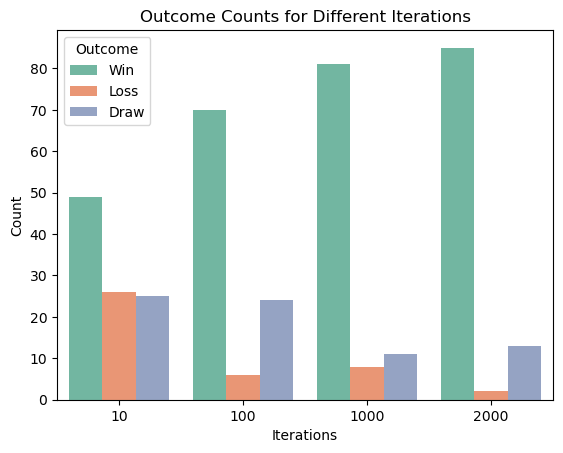

In [38]:




# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'num_iter': combined_mcts['num_iter'].unique(),
    'Win': win_data.groupby('num_iter').size(),
    'Loss': loss_data.groupby('num_iter').size(),
    'Draw': draw_data.groupby('num_iter').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='num_iter', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='num_iter', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.title('Outcome Counts for Different Iterations')

# Show the plot
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

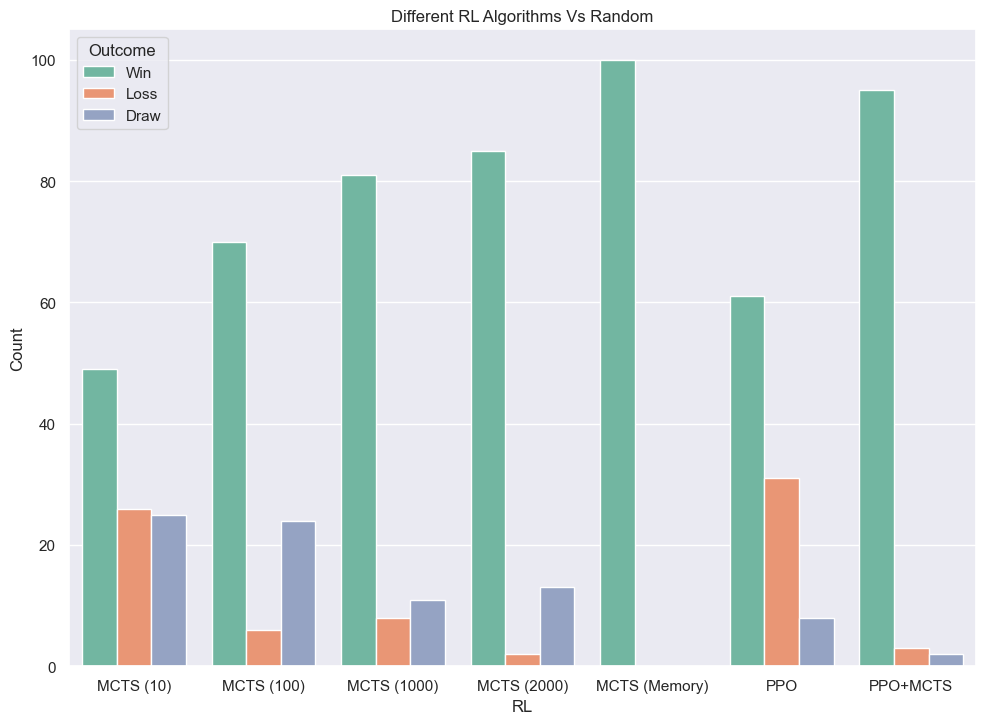

In [49]:
#Stage-01 Against Random

#Create Win,Loss,Draw dataFrame
win_data_RL = rl_basemodel[(rl_basemodel["color"] == rl_basemodel["winner"]) & ~rl_basemodel["winner"].isna()]
loss_data_RL = rl_basemodel[(rl_basemodel["color"] != rl_basemodel["winner"]) & ~rl_basemodel["winner"].isna()]
draw_data_RL = rl_basemodel[rl_basemodel["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_basemodel['RL Methods'].unique(),
    'Win': win_data_RL.groupby('RL Methods').size(),
    'Loss': loss_data_RL.groupby('RL Methods').size(),
    'Draw': draw_data_RL.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('RL')
plt.ylabel('Count')
plt.title('Different RL Algorithms Vs Random')

# Show the plot
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

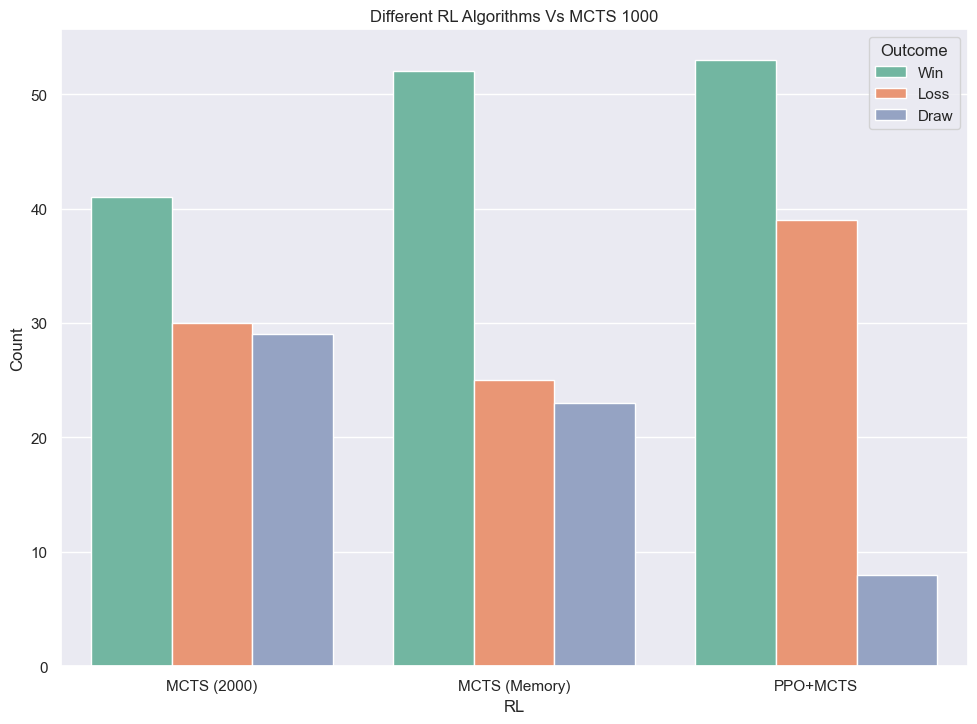

In [48]:
#Stage-02 Against MCTS 1000

#Create Win,Loss,Draw dataFrame
win_data_RL1 = rl_mcts_1000[(rl_mcts_1000["color"] == rl_mcts_1000["winner"]) & ~rl_mcts_1000["winner"].isna()]
loss_data_RL1 = rl_mcts_1000[(rl_mcts_1000["color"] != rl_mcts_1000["winner"]) & ~rl_mcts_1000["winner"].isna()]
draw_data_RL1 = rl_mcts_1000[rl_mcts_1000["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_mcts_1000['RL Methods'].unique(),
    'Win': win_data_RL1.groupby('RL Methods').size(),
    'Loss':loss_data_RL1.groupby('RL Methods').size(),
    'Draw': draw_data_RL1.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title

plt.xlabel('RL')
plt.ylabel('Count')
plt.title('Different RL Algorithms Vs MCTS 1000')

# Show the plot
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

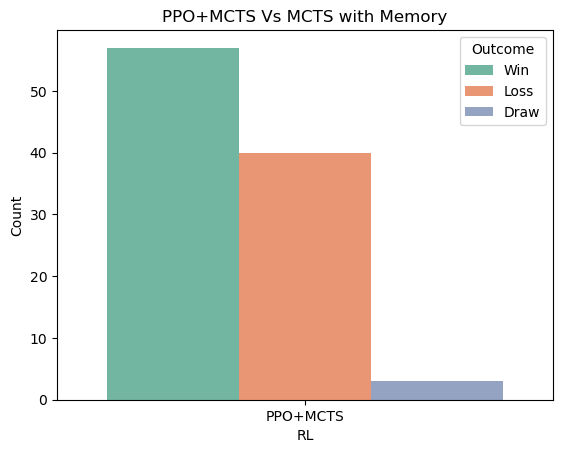

In [41]:
#Stage-03 Against MCTS with Memory

#Create Win,Loss,Draw dataFrame
win_data_RL2 = rl_mcts_with_mem[(rl_mcts_with_mem["color"] == rl_mcts_with_mem["winner"]) & ~rl_mcts_with_mem["winner"].isna()]
loss_data_RL2 = rl_mcts_with_mem[(rl_mcts_with_mem["color"] != rl_mcts_with_mem["winner"]) & ~rl_mcts_with_mem["winner"].isna()]
draw_data_RL2 = rl_mcts_with_mem[rl_mcts_with_mem["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_mcts_with_mem['RL Methods'].unique(),
    'Win': win_data_RL2.groupby('RL Methods').size(),
    'Loss':loss_data_RL2.groupby('RL Methods').size(),
    'Draw': draw_data_RL2.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title

plt.xlabel('RL')
plt.ylabel('Count')
plt.title('PPO+MCTS Vs MCTS with Memory')

# Show the plot
plt.show()

In [42]:
# PPO 
# rewards: 
#   global_wins: 10
#   local_wins: 1
# iterations: 10_000_000
# games: 100

ppo_01_wins = ppo_random_01_1000000[ppo_random_01_1000000["winner"] == ppo_random_01_1000000["color"]].value_counts()
ppo_01_draws = ppo_random_01_1000000["winner"].isna().sum()
ppo_01_losses = ppo_random_01_1000000[ppo_random_01_1000000["winner"] != ppo_random_01_1000000["color"]].value_counts()

print(f"The ppo_01 has won {ppo_01_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_01 has tied {ppo_01_draws} out of 100 games against Baseline Model.")
print(f"The ppo_01 has lost {ppo_01_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_01 has won 61 out of 100 games against Baseline Model.
The ppo_01 has tied 8 out of 100 games against Baseline Model.
The ppo_01 has lost 31 out of 100 games against Baseline Model.


In [43]:
# PPO 
# rewards: 
#   global_wins: 10
#   local_wins: 1
# iterations: 100_000
# games: 100

ppo_02_wins = ppo_random_02_100000[ppo_random_02_100000["winner"] == ppo_random_02_100000["ppo_color"]].value_counts()
ppo_02_draws = ppo_random_02_100000["winner"].isna().sum()
ppo_02_losses = ppo_random_02_100000[ppo_random_02_100000["winner"] != ppo_random_02_100000["ppo_color"]].value_counts()

print(f"The ppo_02 has won {ppo_02_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_02 has tied {ppo_02_draws} out of 100 games against Baseline Model.")
print(f"The ppo_02 has lost {ppo_02_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_02 has won 40 out of 100 games against Baseline Model.
The ppo_02 has tied 23 out of 100 games against Baseline Model.
The ppo_02 has lost 37 out of 100 games against Baseline Model.


In [44]:
# 23rd Nov

# PPO 
# rewards: 
#   global_wins: 50
#   local_wins: 5
#   globa_draw: 10
#   local_draw: 2
#   legal_move: 1
#   illegal_move: -1
# iterations: 75_000_000
# games: 100

ppo_03_wins = ppo_random_03_75000000[ppo_random_03_75000000["winner"] == ppo_random_03_75000000["ppo_color"]].value_counts()
ppo_03_draws = ppo_random_03_75000000["winner"].isna().sum()
ppo_03_losses = ppo_random_03_75000000[ppo_random_03_75000000["winner"] != ppo_random_03_75000000["ppo_color"]].value_counts()

print(f"The ppo_03 has won {ppo_03_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_03 has tied {ppo_03_draws} out of 100 games against Baseline Model.")
print(f"The ppo_03 has lost {ppo_03_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_03 has won 35 out of 100 games against Baseline Model.
The ppo_03 has tied 65 out of 100 games against Baseline Model.
The ppo_03 has lost 0 out of 100 games against Baseline Model.


In [45]:
# 23rd Nov

# PPO v4
# rewards: 
#   global_wins: 50
#   local_wins: 5
#   globa_draw: 10
#   local_draw: 2
#   legal_move: 1
#   illegal_move: -1
# iterations: 1_000_000
# games: 100

ppo_04_wins = ppo_random_04[ppo_random_04["winner"] == ppo_random_04["ppo_color"]].value_counts()
ppo_04_draws = ppo_random_04["winner"].isna().sum()
ppo_04_losses = ppo_random_04[ppo_random_04["winner"] != ppo_random_04["ppo_color"]].value_counts()

print(f"The ppo_04 has won {ppo_04_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_04 has tied {ppo_04_draws} out of 100 games against Baseline Model.")
print(f"The ppo_04 has lost {ppo_04_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_04 has won 16 out of 100 games against Baseline Model.
The ppo_04 has tied 83 out of 100 games against Baseline Model.
The ppo_04 has lost 1 out of 100 games against Baseline Model.


In [46]:
# 23rd Nov

# PPO v4
# rewards: 
#   global_wins: 100
#   local_wins: 5
#   globa_draw: 10
#   local_draw: 2
#   legal_move: 1
#   illegal_move: -2
# iterations: 1_000_000
# games: 100

ppo_04_2_wins = ppo_random_04_2[ppo_random_04_2["winner"] == ppo_random_04_2["ppo_color"]].value_counts()
ppo_04_2_draws = ppo_random_04_2["winner"].isna().sum()
ppo_04_2_losses = ppo_random_04_2[ppo_random_04_2["winner"] != ppo_random_04_2["ppo_color"]].value_counts()

print(f"The ppo_04_2 has won {ppo_04_2_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_04_2 has tied {ppo_04_2_draws} out of 100 games against Baseline Model.")
print(f"The ppo_04_2 has lost {ppo_04_2_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_04_2 has won 42 out of 100 games against Baseline Model.
The ppo_04_2 has tied 58 out of 100 games against Baseline Model.
The ppo_04_2 has lost 0 out of 100 games against Baseline Model.
